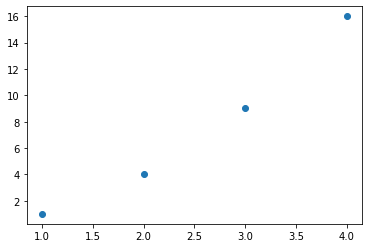

In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x=[1,2,3,4]
y=[1,4,9,16]

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(x, y, 'o')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("I clicked at x={0:5.2f}, y={1:5.2f}".format(ix,iy))

    # Calculate, based on the axis extent, a reasonable distance 
    # from the actual point in which the click has to occur (in this case 5%)
    ax = plt.gca()
    dx = 0.05 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    dy = 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])

    # Check for every point if the click was close enough:
    for i in range(len(x)):
        if(x[i] > ix-dx and x[i] < ix+dx and y[i] > iy-dy and y[i] < iy+dy):
            print("You clicked close enough!")

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

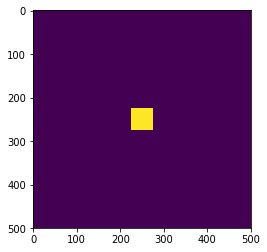

In [22]:
plt.imshow(mask3d[:,:,15])

In [2]:
mlab.test_

AttributeError: module 'mayavi.mlab' has no attribute 'test_'

In [4]:
mlab.test_contour3d()

In [5]:
mlab.test_contour3d??

In [6]:
import numpy as np
from numpy import *

In [30]:
mlab.clf()
t = linspace(0, 2*pi, 1000)

x,y,z = sin(t), cos(t), t

mlab.plot3d(x,y,t, color=(1,0,0))
mlab.points3d(x[-1], y[-1], z[-1])

In [8]:
####

In [9]:
from numpy import mgrid

In [10]:
#### surf

In [31]:
mlab.clf()
x, y = mgrid[-3:3:100j, -3:3:100j]
z = sin(x*x + y*y)
mlab.surf(x,y,z)

In [ ]:
#### boolean visulization

In [44]:
mlab.clf()
x, y = mgrid[0:512:512j, 0:512:512j]
z = np.zeros([512,512])
z[225:275, 225:275] = 1
mlab.surf(x,y,z)

In [12]:
#### contour surf

In [13]:
mlab.clf()
x, y = mgrid[-3:3:100j, -3:3:100j]
z = sin(x*x + y*y)
mlab.contour_surf(x,y,z)

In [14]:
####“

In [15]:
mlab.clf()
mlab.mesh(sin(x),cos(y),z)

In [16]:
#### 

In [17]:
phi, theta = np.mgrid[0:pi:20j, 0:2*pi:20j]
x = sin(phi)*cos(theta)
y = sin(phi)*sin(theta)
z = cos(phi)

mlab.clf()
mlab.mesh(x,y,z, representation="wireframe")

In [18]:
####

In [19]:
t = [[0,1,2],]
points = np.array([[0,0,0], [1,0,0], [1,1,0]])
x,y,z = points.T

mlab.clf()
mlab.triangular_mesh(x,y,z,t)

In [20]:
####

In [21]:
x,y,z = np.mgrid[-5:5:64j, -5:5:64j, -5:5:64j]
mlab.clf()
mlab.contour3d(x*x*0.5 + y*y + z*z*2)

In [22]:
x.shape, y.shape, z.shape

((64, 64, 64), (64, 64, 64), (64, 64, 64))

In [23]:
mlab.clf()
mlab.volume_slice(x,y,z, x*x*0.5 + y*y + z*z*2)

In [24]:
#### animations

In [29]:
mlab.clf()
import time

x, y = np.mgrid[0:2:1, 0:2:1]
s = mlab.surf(x, y, x*0.1)
for i in range(20):
    s.mlab_source.scalars = x*0.1*(i+1)
    time.sleep(0.2)

In [ ]:
#####

In [47]:
mlab.clf()
mlab.test_flow()

In [46]:
#### vector cut plane

In [ ]:
#### create data set

In [48]:
%gui qt

In [50]:
import numpy as np
from mayavi import mlab

mlab.pipeline.open("data/room_vis_wrl")

ERROR:mayavi.core.common:No suitable reader found for the file data/room_vis_wrl


In [55]:
from tvtk.api import tvtk
from scipy import special
# scalar values
x, y = np.mgrid[-10:10:20j,-10:10:20j]
r = np.sqrt(x**2+y**2)
z = 5.0*special.j0(r)

In [56]:
from tvtk.api import tvtk 
spoints = tvtk.StructuredPoints(origin=(-10,10,0),
                               spacing=(0.5,0.5,1),
                               dimensions=(20,20,1))

In [58]:
spoints.point_data.scalars = r.T.ravel()
spoints.point_data.scalars.name = "scalar"

In [63]:
mlab.clf()
src = mlab.pipeline.add_dataset(spoints)
warp = mlab.pipeline.warp_scalar(src)
surf = mlab.pipeline.surface(warp)


In [85]:
### 3d
x,y,z = np.mgrid[-5:5:120j, -5:5:128j, -5:5:128j]
x,y,z = [t.astype("f") for t in (x,y,z)]
scalars = np.sin(x*y*z) / (x*y*z)

spoints = tvtk.StructuredPoints(origin = (-5,-5,-5),
                              spacing=(10./127,10./127,10./127),
                              dimensions=(128,128,128))

s = scalars.transpose().copy()
spoints.point_data.scalars = s.ravel("F")
spoints.point_data.scalars.name = "scalars"

mlab.clf()
src = mlab.pipeline.add_dataset(spoints)

cut = mlab.pipeline.scalar_cut_plane(src)
contour = mlab.pipeline.iso_surface(src)

In [ ]:
### oct dicom example

In [108]:
### 3d
x,y,z = np.mgrid[0:128:128j, 0:128:128j, 0:128:128j]
x,y,z = [t.astype("f") for t in (x,y,z)]
scalars = np.zeros([128,128,128])
scalars[44:84, 44:84, 44:84] = 1

scalars[14:24, 14:24, 14:24] = 2

spoints = tvtk.StructuredPoints(origin = (0,0,0),
                              spacing=(1,1,1),
                              dimensions=(128,128,128))

s = scalars.transpose().copy()
spoints.point_data.scalars = s.ravel("F")
spoints.point_data.scalars.name = "scalars"

mlab.clf()
src = mlab.pipeline.add_dataset(spoints)

cut = mlab.pipeline.scalar_cut_plane(src)
contour = mlab.pipeline.iso_surface(src)

lut = contour.module_manager.scalar_lut_manager.lut.table.to_array()
lut[0] = [255, 255, 255, 0]
lut[1] = [255, 255, 0, 255]

contour.module_manager.scalar_lut_manager.lut.table = lut


In [112]:
#### volume rendering

[0.0, ..., 0.0], length = 2097152

In [2]:
import vtk
import glob
import os

PROJ_DIR = "/home/olle/PycharmProjects/feature_segmentation-master"
RECORD_PATH = "/data/train_data/hq_examples_fibrosis/volumes/1475_R_20170705_552087001_15"
DATA_PATH = os.path.join(PROJ_DIR,RECORD_PATH)
# PNG files path source (stack of images)
files=glob.glob(DATA_PATH+"/vol/*.png")

In [3]:
# Setting the file path
filePath = vtk.vtkStringArray()
# Sorting file to arrange in ascending order to get slices correctly
files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
filePath.SetNumberOfValues(len(files))

for i in range(0,len(files),1):
    filePath.SetValue(i,files[i])
# print(files[i])

In [4]:
# 1. Source -Reader
reader=vtk.vtkPNGReader()
reader.SetFileNames(filePath)
reader.SetDataSpacing(1,1,1)

In [ ]:
#reader.Update()

In [5]:
# 2. Filter --&gt; Setting the color mapper, Opacity for VolumeProperty
colorFunc = vtk.vtkColorTransferFunction()
colorFunc.AddRGBPoint(1, 1, 0.0, 0.0) # Red

# To set different colored pores
colorFunc.AddRGBPoint(2, 0.0, 1, 0.0) # Green
#colorFunc.AddRGBPoint(3, 0.0, 0, 1.0) # Black
#colorFunc.AddRGBPoint(4, 0.0, 0.0, 1) # Blue

opacity = vtk.vtkPiecewiseFunction()
# opacity.AddPoint(1, 1, 0.0, 0.0)
# opacity.AddPoint(2, 0.0, 0.0, 0.0)

# The previous two classes stored properties and we want to apply
# these properties to the volume we want to render,
# we have to store them in a class that stores volume properties.
volumeProperty = vtk.vtkVolumeProperty()
# set the color for volumes
volumeProperty.SetColor(colorFunc)
# To add black as background of Volume
volumeProperty.SetScalarOpacity(opacity)
volumeProperty.SetInterpolationTypeToLinear()
volumeProperty.SetIndependentComponents(2)


In [9]:
#Ray cast function know how to render the data
volumeMapper = vtk.vtkOpenGLGPUVolumeRayCastMapper()
#volumeMapper = vtk.vtkFixedPointVolumeRayCastMapper()
#volumeMapper = vtk.vtkUnstructuredGridVolumeRayCastMapper()

volumeMapper.SetInputConnection(reader.GetOutputPort())
volumeMapper.SetBlendModeToMaximumIntensity()

# Different modes are available in vtk for Blend mode functions
#volumeMapper.SetBlendModeToAverageIntensity()
#volumeMapper.SetBlendModeToMinimumIntensity()
#volumeMapper.SetBlendModeToComposite()
#volumeMapper.SetBlendModeToAdditive()

volume = vtk.vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)
ren = vtk.vtkRenderer()
ren.AddVolume(volume)
#No need to set by default it is black
ren.SetBackground(0, 0, 0)
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
renWin.SetSize(900, 900)
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(renWin)



In [1]:
import vtk
from numpy import *

# We begin by creating the data we want to render.
# For this tutorial, we create a 3D-image containing three overlaping cubes. 
# This data can of course easily be replaced by data from a medical CT-scan or anything else three dimensional.
# The only limit is that the data must be reduced to unsigned 8 bit or 16 bit integers.
data_matrix = zeros([75, 75, 75], dtype=uint8)
data_matrix[0:35, 0:35, 0:35] = 50
data_matrix[25:55, 25:55, 25:55] = 100
data_matrix[45:74, 45:74, 45:74] = 150

# For VTK to be able to use the data, it must be stored as a VTK-image. This can be done by the vtkImageImport-class which
# imports raw data and stores it. 
dataImporter = vtk.vtkImageImport()
# The preaviusly created array is converted to a string of chars and imported.
data_string = data_matrix.tostring()
dataImporter.CopyImportVoidPointer(data_string, len(data_string))
# The type of the newly imported data is set to unsigned char (uint8)
dataImporter.SetDataScalarTypeToUnsignedChar()
# Because the data that is imported only contains an intensity value (it isnt RGB-coded or someting similar), the importer
# must be told this is the case.
dataImporter.SetNumberOfScalarComponents(1)
# The following two functions describe how the data is stored and the dimensions of the array it is stored in. For this
# simple case, all axes are of length 75 and begins with the first element. For other data, this is probably not the case.
# I have to admit however, that I honestly dont know the difference between SetDataExtent() and SetWholeExtent() although
# VTK complains if not both are used.
dataImporter.SetDataExtent(0, 74, 0, 74, 0, 74)
dataImporter.SetWholeExtent(0, 74, 0, 74, 0, 74)

# The following class is used to store transparencyv-values for later retrival. In our case, we want the value 0 to be
# completly opaque whereas the three different cubes are given different transperancy-values to show how it works.
alphaChannelFunc = vtk.vtkPiecewiseFunction()
alphaChannelFunc.AddPoint(0, 0.0)
alphaChannelFunc.AddPoint(50, 0.05)
alphaChannelFunc.AddPoint(100, 0.1)
alphaChannelFunc.AddPoint(150, 0.2)

# This class stores color data and can create color tables from a few color points. For this demo, we want the three cubes
# to be of the colors red green and blue.
colorFunc = vtk.vtkColorTransferFunction()
colorFunc.AddRGBPoint(50, 1.0, 0.0, 0.0)
colorFunc.AddRGBPoint(100, 0.0, 1.0, 0.0)
colorFunc.AddRGBPoint(150, 0.0, 0.0, 1.0)

# The preavius two classes stored properties. Because we want to apply these properties to the volume we want to render,
# we have to store them in a class that stores volume prpoperties.
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorFunc)
volumeProperty.SetScalarOpacity(alphaChannelFunc)

# This class describes how the volume is rendered (through ray tracing).
compositeFunction = vtk.vtkVolumeRayCastCompositeFunction()
# We can finally create our volume. We also have to specify the data for it, as well as how the data will be rendered.
volumeMapper = vtk.vtkVolumeRayCastMapper()
volumeMapper.SetVolumeRayCastFunction(compositeFunction)
volumeMapper.SetInputConnection(dataImporter.GetOutputPort())

# The class vtkVolume is used to pair the preaviusly declared volume as well as the properties to be used when rendering that volume.
volume = vtk.vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)

# With almost everything else ready, its time to initialize the renderer and window, as well as creating a method for exiting the application
renderer = vtk.vtkRenderer()
renderWin = vtk.vtkRenderWindow()
renderWin.AddRenderer(renderer)
renderInteractor = vtk.vtkRenderWindowInteractor()
renderInteractor.SetRenderWindow(renderWin)

# We add the volume to the renderer ...
renderer.AddVolume(volume)
# ... set background color to white ...
renderer.SetBackground(1, 1, 1)
# ... and set window size.
renderWin.SetSize(400, 400)

# A simple function to be called when the user decides to quit the application.
def exitCheck(obj, event):
    if obj.GetEventPending() != 0:
        obj.SetAbortRender(1)

# Tell the application to use the function as an exit check.
renderWin.AddObserver("AbortCheckEvent", exitCheck)

renderInteractor.Initialize()
# Because nothing will be rendered without any input, we order the first render manually before control is handed over to the main-loop.
renderWin.Render()
renderInteractor.Start()

AttributeError: module 'vtk' has no attribute 'vtkVolumeRayCastCompositeFunction'